In [2]:
import pandas as pd
import numpy as np 
# import lib.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns #import lib.

In [4]:
sns.set(rc={'figure.figsize':(9,6)}) #set graf

In [5]:
ls #files of directories

 1.4.ipynb   4.1.ipynb                        submissions_data_train.csv
 1.6.ipynb   event_data_train.csv             Untitled1.ipynb
 2.1/       'Example data processing.ipynb'   Untitled.ipynb
 2.7.ipynb   movie_metadata.csv
 3.7.ipynb  'Stepic titanic'/


In [6]:
events_data = pd.read_csv('event_data.csv') #read csv data

In [7]:
events_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480703 entries, 0 to 3480702
Data columns (total 4 columns):
step_id      int64
timestamp    int64
action       object
user_id      int64
dtypes: int64(3), object(1)
memory usage: 106.2+ MB


In [8]:
events_data.head(10) #view our data

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632
5,32811,1434340895,passed,17632
6,32929,1434340921,discovered,17632
7,32929,1434340921,viewed,17632
8,32929,1434340939,started_attempt,17632
9,32929,1434340944,passed,17632


In [9]:
events_data.action.unique() #view action position

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

In [10]:
events_data['date'] = pd.to_datetime(events_data.timestamp, unit='s')# the timestamp converte in date

In [11]:
events_data.head()

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35


In [12]:
events_data.dtypes #view data types

step_id               int64
timestamp             int64
action               object
user_id               int64
date         datetime64[ns]
dtype: object

In [13]:
events_data.date.min() 

Timestamp('2015-06-15 04:00:48')

In [14]:
events_data.date.max() #view min and max time used of students

Timestamp('2018-05-19 23:33:31')

In [15]:
events_data['day'] = events_data.date.dt.date# add column with 'day'

In [16]:
events_data.head()# view

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


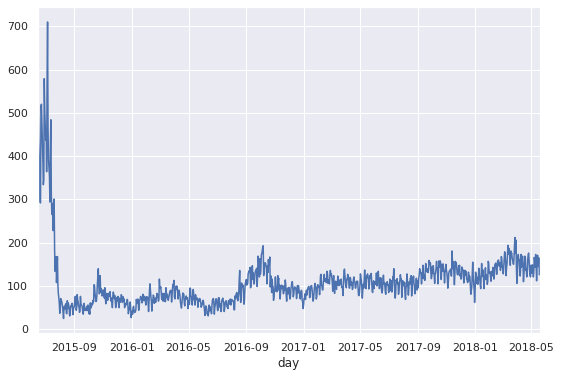

In [17]:
events_data.groupby('day').user_id.nunique().plot()# view data about users

In [18]:
events_data.pivot_table(index='user_id', columns='action', values='step_id', aggfunc='count', fill_value=0).reset_index().head()
#create users activity table

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


In [19]:
users_events_data = events_data.pivot_table(index='user_id', columns='action', values='step_id', aggfunc='count', fill_value=0).reset_index()

In [20]:
users_events_data.head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


In [21]:
submissions_data = pd.read_csv('submissions_data_train.csv')

In [22]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


In [23]:
submissions_data['date'] = pd.to_datetime(submissions_data.timestamp, unit='s')# the timestamp converte in date
submissions_data['day'] = submissions_data.date.dt.date# add column with 'day'

In [24]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [25]:
users_scores = submissions_data.pivot_table(index='user_id', columns='submission_status', values='step_id', aggfunc='count', fill_value=0).reset_index()
#create  table

In [26]:
users_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [27]:
events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id','day']).head()
#user day online value

,user_id,day,timestamp
0,17632,2015-06-15,1434340848
36,12494,2015-06-15,1434341931
59,442,2015-06-15,1434342029
62,22254,2015-06-15,1434342042
94,6646,2015-06-15,1434342230


In [28]:
events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id','day']).groupby('user_id')['timestamp'].apply(list).head()


user_id
1                                         [1472827464]
2                             [1514383364, 1519226966]
3    [1434358476, 1441257725, 1441440209, 144153391...
5                             [1466156809, 1499859621]
7                                         [1521634660]
Name: timestamp, dtype: object

In [29]:
events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id','day']).groupby('user_id')['timestamp'].apply(list).apply(np.diff).head()
#time between unique timestamp

user_id
1                                                  []
2                                           [4843602]
3    [6899249, 182484, 93710, 2768870, 171400, 78712]
5                                          [33702812]
7                                                  []
Name: timestamp, dtype: object

In [30]:
gap_data = events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id','day']).groupby('user_id')['timestamp'].apply(list).apply(np.diff).values


In [31]:
gap_data = pd.Series(np.concatenate(gap_data, axis=0)) 
# the values of difference between users input course

In [32]:
gap_data = gap_data/(24*60*60)# разница в днях между перерывами захода на курс



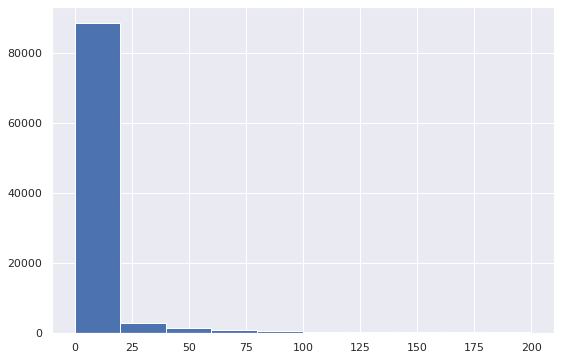

In [33]:
gap_data[gap_data<200].hist()

In [34]:
gap_data.quantile(0.9)

18.325995370370403

In [35]:
#ПРинимаем порог месяц (timestamp). Размечаем пользователей свалил/не свалил относительно крайней даты датасета

In [36]:
timestamp_por = 31*24*60*60

In [37]:
timestamp_por

2678400

In [38]:
events_data.tail()

,step_id,timestamp,action,user_id,date,day
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19
3480702,33892,1526772811,viewed,18526,2018-05-19 23:33:31,2018-05-19


In [39]:
users_data = events_data.groupby('user_id', as_index=False).agg({'timestamp':'max'}).rename(columns={'timestamp' : 'last_timestamp'})

In [40]:
now = 1526772811
drop_out_threshold = timestamp_por
#пороговое значение, говорящее, что пользователь ушёл. Входит в диапазон между 90 и 95 перцентилем

In [41]:
users_data['is_gone_user'] =(now - users_data.last_timestamp)>drop_out_threshold
#Сколько времени прошло с момента последнего посещения пользователя  по сравнению с текущим таймстентом(1526772811)

In [42]:
users_data.head()# Если пользователь отсутствовал более 30 дней, считаем, что курс брошен.

,user_id,last_timestamp,is_gone_user
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True


In [43]:


#добавим к таблице данные про число попыток (успешных и неуспешных) и число набранных баллов

In [44]:
users_data = users_data.merge(users_scores, on='user_id', how='outer')

In [45]:
users_data = users_data.fillna(0)

In [46]:
users_data.head(20)

,user_id,last_timestamp,is_gone_user,correct,wrong
0,1,1472827464,True,0.0,0.0
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,0.0,0.0
5,8,1481466913,True,9.0,21.0
6,9,1484999497,True,0.0,0.0
7,11,1526140625,False,0.0,0.0
8,14,1436368676,True,0.0,1.0
9,16,1513162585,True,77.0,106.0


In [47]:
users_data = users_data.merge(users_events_data, how='outer')

In [48]:
users_days = events_data.groupby('user_id').day.nunique().to_frame().reset_index()

In [49]:
users_days.head()

,user_id,day
0,1,1
1,2,2
2,3,7
3,5,2
4,7,1


In [50]:
users_data = users_data.merge(users_days, how='outer')

In [51]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
0,1,1472827464,True,0.0,0.0,1,0,0,1,1
1,2,1519226966,True,2.0,0.0,9,9,2,10,2
2,3,1444581588,True,29.0,23.0,91,87,30,192,7
3,5,1499859939,True,2.0,2.0,11,11,4,12,2
4,7,1521634660,True,0.0,0.0,1,1,0,1,1


In [52]:
users_data.user_id.nunique()

19234

In [53]:
events_data.user_id.nunique()

19234

In [54]:
users_data['passed_course'] = users_data.passed > 170

In [55]:
users_data.head(10)

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_course
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False
5,8,1481466913,True,9.0,21.0,109,84,37,156,2,False
6,9,1484999497,True,0.0,0.0,3,3,0,4,1,False
7,11,1526140625,False,0.0,0.0,1,0,1,1,1,False
8,14,1436368676,True,0.0,1.0,4,3,1,9,1,False
9,16,1513162585,True,77.0,106.0,196,196,108,651,21,True


In [56]:
users_data.groupby('passed_course').count()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
passed_course,,,,,,,,,,
False,17809,17809,17809,17809,17809,17809,17809,17809,17809,17809
True,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425


In [57]:
100*1425/17809 #Прошли курс 8%

8.001572238755685

In [58]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_course
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False


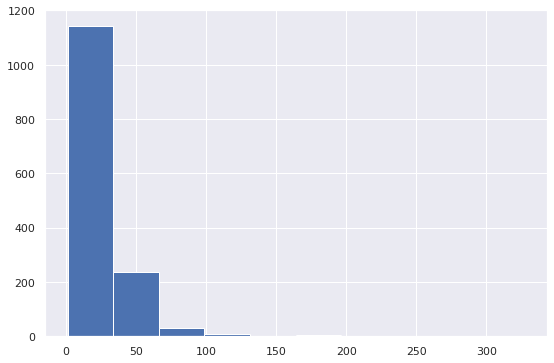

In [59]:
users_data[users_data.passed_course].day.hist()#сколько людей окончило курс распределение

In [60]:
users_data[users_data.passed_course].day.median() 

20.0

In [61]:
#нам нужны события, которые происходили втечение трех дней 

In [62]:
user_min_time = events_data.groupby('user_id',as_index=False
                                   ).agg({'timestamp':'min'}
                                        ).rename({'timestamp':'min_timestamp'}, axis=1)

#первое активное действие на курсе

In [63]:
users_data= users_data.merge(user_min_time, how='outer')

In [64]:
user_min_time.head()

,user_id,min_timestamp
0,1,1472827464
1,2,1514383364
2,3,1434358476
3,5,1466156809
4,7,1521634660


In [65]:
#'неверный' подход

In [66]:
events_data_train = pd.DataFrame()

In [67]:
#for user_id in users_data.user_id:
#    min_user_time = users_data[users_data.user_id == user_id].min_timestamp.item()
#    time_threshold = min_user_time + 3*24*60*60
#    
#    user_events_data = events_data[(events_data.user_id == user_id) & (events_data.timestamp<time_threshold)]
#    
#    break

In [68]:
events_data['user_time'] = events_data.user_id.map(str)+'_'+events_data.timestamp.map(str)

In [69]:
events_data.head()

,step_id,timestamp,action,user_id,date,day,user_time
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895


In [70]:
learning_time_threshold = 3*24*60*60
learning_time_threshold

259200

In [71]:
user_learning_time_threshold = user_min_time.user_id.map(str) + '_'+ (user_min_time.min_timestamp+learning_time_threshold).map(str)

In [72]:
user_min_time['user_learning_time_threshold'] = user_learning_time_threshold

In [73]:
events_data = events_data.merge(user_min_time[['user_id', 'user_learning_time_threshold']], how='outer')

In [74]:
events_data.shape

(3480703, 8)

In [75]:
events_data_train = events_data[events_data.user_time<=events_data.user_learning_time_threshold]

In [76]:
events_data_train.head()

,step_id,timestamp,action,user_id,date,day,user_time,user_learning_time_threshold
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048


In [77]:
events_data_train.groupby('user_id').day.nunique().max()

4

In [78]:
submissions_data['users_time'] = submissions_data.user_id.map(str) + '_' + submissions_data.timestamp.map(str)
submissions_data = submissions_data.merge(user_min_time[['user_id', 'user_learning_time_threshold']], how='outer')
submissions_data_train = submissions_data[submissions_data.users_time <= submissions_data.user_learning_time_threshold]
submissions_data_train.groupby('user_id').day.nunique().max()

4

In [79]:
X = submissions_data_train.groupby('user_id').day.nunique().to_frame().reset_index().rename(columns={'day':'days'})

In [80]:
X.head()

,user_id,days
0,2,1
1,3,1
2,8,1
3,14,1
4,16,3


In [81]:
steps_tried = submissions_data_train.groupby('user_id').step_id.nunique().to_frame().reset_index().rename(columns={'step_id':'steps_tried'})

In [82]:
X = X.merge(steps_tried, on = 'user_id', how='outer')

In [83]:
X.shape

(8913, 3)

In [84]:
X = X.merge(submissions_data_train.pivot_table(index='user_id', columns='submission_status', values='step_id', aggfunc='count', fill_value=0).reset_index())


In [85]:
X['correct_ratio'] = X.correct/(X.correct+X.wrong)

In [86]:
X.head()

,user_id,days,steps_tried,correct,wrong,correct_ratio
0,2,1,2,2,0,1.00
1,3,1,4,4,4,0.50
2,8,1,11,9,21,0.30
3,14,1,1,0,1,0.00
4,16,3,23,23,27,0.46


In [87]:
X = X.merge(events_data_train.pivot_table(index='user_id', columns='action', values='step_id', aggfunc='count', fill_value=0).reset_index()[['user_id', 'viewed']], how='outer')


In [88]:
X = X.fillna(0)

In [89]:
X = X.merge(users_data[['user_id','passed_course', 'is_gone_user']], how='outer')

In [90]:
X = X[~((X.is_gone_user == False) & (X.passed_course == False))]

In [91]:
y = X.passed_course.map(int)

In [92]:
X = X.drop(['passed_course','is_gone_user'], axis=1)


In [93]:
X = X.set_index(X.user_id)
X = X.drop(['user_id'], axis=1)